# Outliers

A data point that differs significantly from other data points in the same dataset.

**Identifying outliers**:
- **Distance from mean:** points that lie more than 3 standard deviations from the mean are often considered outliers.
- **Distance from fitted line (in regression analysis):** data points that do not fit into the same relationship as the rest of the data.

The first most important thing is to scrutinize outliers, investigating if it is really a error or something to be taken care of.

Dataset:<br>
https://www.kaggle.com/shwetabh123/mall-customers

In [1]:
import pandas as pd
# import matplotlib as plt

In [5]:
df = pd.read_csv('datasets/mall_customers.csv')

In [6]:
# Visualizando as 5 primeiras linhas/observações
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
df.shape

(200, 5)

In [8]:
df.nunique()

CustomerID                200
Genre                       2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

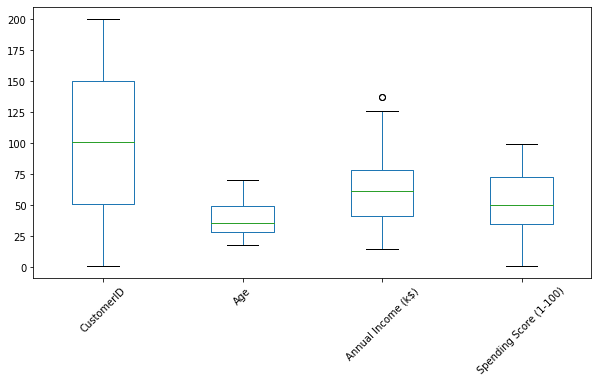

In [12]:
df.boxplot(grid = False,
           rot = 45,
           figsize = (10, 5));

In [15]:
df.loc[df['Annual Income (k$)'] > 125]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [16]:
q1 = df['Annual Income (k$)'].quantile(0.25)
q3 = df['Annual Income (k$)'].quantile(0.75)
print('Primeiro quartil:', q1,
      '\nTerceiro quartil:',q3)

Primeiro quartil: 41.5 
Terceiro quartil: 78.0


In [17]:
iqr = q3 - q1
iqr

36.5

In [18]:
df['Annual_Income_Outlier'] = False

In [19]:
q1 + 1.5 * iqr

96.25

In [20]:
for index, row in df.iterrows():
    if row['Annual Income (k$)'] > (q1 + 1.5 * iqr):
        df.at[index, 'Annual_Income_Outlier'] = True

In [21]:
df['Annual_Income_Outlier'].sum()

20

In [22]:
non_outliers = df.loc[df['Annual_Income_Outlier'] == False]
non_outliers.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Annual_Income_Outlier
0,1,Male,19,15,39,False
1,2,Male,21,15,81,False
2,3,Female,20,16,6,False
3,4,Female,23,16,77,False
4,5,Female,31,17,40,False


In [23]:
mean = non_outliers['Annual Income (k$)'].mean()
mean

55.1

In [24]:
for index, row in df.iterrows():
    if row['Annual_Income_Outlier'] == True:
        df.at[index, 'Annual Income (k$)'] = mean

In [25]:
# Visualiza 5 linhas/observações aleatórias
df.sample(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Annual_Income_Outlier
179,180,Male,35,93,90,False
166,167,Male,42,86,20,False
187,188,Male,28,55,68,True
56,57,Female,51,44,50,False
186,187,Female,54,55,24,True


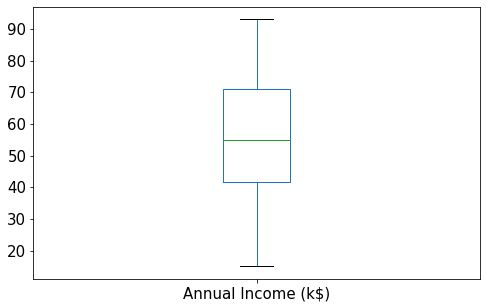

In [26]:
df.boxplot(grid = False,
           fontsize = 15,
           column = 'Annual Income (k$)',
           figsize = (8, 5));